# Work with different data formats (binary, netCDF, .mat)

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

================

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Binary data

### Open binary

Data from [Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data](http://nsidc.org/data/nsidc-0051.html).

In [2]:
!wget ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_200709_f13_v1.1_n.bin

--2020-03-19 09:42:56--  ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_200709_f13_v1.1_n.bin
           => “nt_200709_f13_v1.1_n.bin.2”
Resolving sidads.colorado.edu... 128.138.135.20
Connecting to sidads.colorado.edu|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly ... done.
==> SIZE nt_200709_f13_v1.1_n.bin ... 136492
==> PASV ... done.    ==> RETR nt_200709_f13_v1.1_n.bin ... done.

    [ <=>                                   ] 136,492      786K/s   in 0.2s    

2020-03-19 09:42:56 (786 KB/s) - “nt_200709_f13_v1.1_n.bin.2” saved [136492]



Create file id:

In [3]:
ice = np.fromfile('nt_200709_f13_v1.1_n.bin', dtype='uint8')

We use *uint8* data type. 
[List of numpy data types](http://docs.scipy.org/doc/numpy/user/basics.types.html)

The file format consists of a 300-byte descriptive header followed by a two-dimensional array.

In [4]:
ice = ice[300:]

Reshape

In [5]:
ice = ice.reshape(448,304)

Simple visualisation of array with imshow (Matplotlib function):

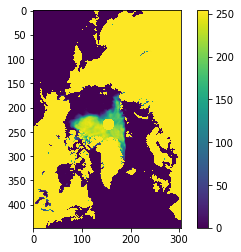

In [6]:
plt.imshow(ice)
plt.colorbar();

To convert to the fractional parameter range of 0.0 to 1.0, divide the scaled data in the file by 250.

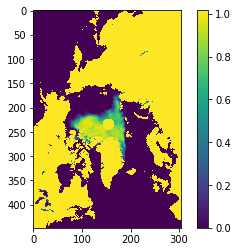

In [7]:
ice = ice/250.
plt.imshow(ice)
plt.colorbar();

Let's mask all land and missing values:

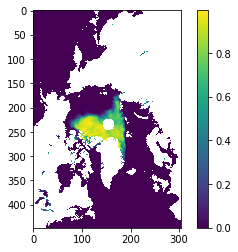

In [8]:
ice_masked = np.ma.masked_greater(ice, 1.0)
plt.imshow(ice_masked)
plt.colorbar();

Masking in this case is similar to using *NaN* in Matlab. [More about NumPy masked arrays](http://docs.scipy.org/doc/numpy/reference/maskedarray.html)

### Save binary

In [9]:
fid = open('My_ice_2007.bin', 'wb')
ice.tofile(fid)
fid.close()

In order to work with other data formats we need to use one of the SciPy submodules:

## SciPy

<img  height="100" src="files/scipy.png" >

General purpose scientific library (that consist of bunch of sublibraries) and builds on NumPy arrays.

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

We are going to use only scipy.io library.

## scipy.io

### Open .mat files

First we have to load function that works with Matlab files:

In [10]:
from scipy.io import loadmat

We are going to download [Polar science center Hydrographic Climatology (PHC)](http://psc.apl.washington.edu/nonwp_projects/PHC/Climatology.html) for January in Matlab format.

In [11]:
!wget https://www.dropbox.com/s/0kuzvz03gw6d393/PHC_jan.mat

--2020-03-19 09:42:57--  https://www.dropbox.com/s/0kuzvz03gw6d393/PHC_jan.mat
Resolving www.dropbox.com... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0kuzvz03gw6d393/PHC_jan.mat [following]
--2020-03-19 09:42:58--  https://www.dropbox.com/s/raw/0kuzvz03gw6d393/PHC_jan.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0cb5d1fc35d8e824b3ee9a3101.dl.dropboxusercontent.com/cd/0/inline/A0MSPUl10wFFwwCw3Q_Na8KADdSiT0CdigFkd5lw0ARaESQjNKzfPqdMk_43hltANOmxE0N-12uAk2LSuID_PVAe51GBv5eGnUSmhIx3QMuDfQ/file# [following]
--2020-03-19 09:42:58--  https://uc0cb5d1fc35d8e824b3ee9a3101.dl.dropboxusercontent.com/cd/0/inline/A0MSPUl10wFFwwCw3Q_Na8KADdSiT0CdigFkd5lw0ARaESQjNKzfPqdMk_43hltANOmxE0N-12uAk2LSuID_PVAe51GBv5eGnUSmhIx3QMuDfQ/file
Resolving uc0cb5d1fc35d8e824b3ee9a3101.dl.dropboxuserconte

Open file:

In [12]:
all_variables = loadmat('PHC_jan.mat')

We can look at the names of variables stored in the file:

In [13]:
all_variables.keys()

dict_keys(['__header__', '__version__', '__globals__', 'LAT', 'LON', 'DEPTH', 'PTEMP1'])

We need only *PTEMP1* (3d potential temperature).

In [14]:
temp = np.array(all_variables['PTEMP1'])

Check variable's shape:

In [15]:
temp.shape

(33, 180, 360)

Show surface level:

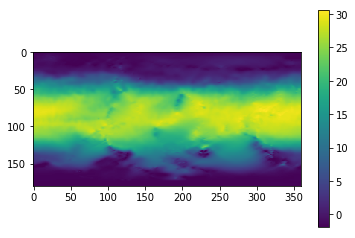

In [16]:
plt.imshow(temp[0,:,:])
plt.colorbar();

### Open netCDF files

Scipy have function for working with netCDF files, and you can import it with:
    from scipy.io import netcdf
However it only supports netCDF3 format. It is better to use [python netcdf4](https://github.com/Unidata/netcdf4-python) module that have a lot of nice functionality. Moreover NCEP reanalysis data, that we are going to work with are in netCDF4 format.

Import nessesary function:

In [17]:
import sys
!pip install netCDF4 --user

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
from netCDF4 import Dataset

I am going to download [NCEP reanalysis data](http://www.esrl.noaa.gov/psd/data/reanalysis/reanalysis.shtml). Surface 4 daily air temperature for 2012.

In [19]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2016.nc

#Alternative for the times of US goverment shutdowns:
#!wget http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis/surface/air.sig995.2012.nc

--2020-03-19 09:43:01--  ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2016.nc
           => “air.2m.gauss.2016.nc”
Resolving ftp.cdc.noaa.gov... 140.172.38.117
Connecting to ftp.cdc.noaa.gov|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/ncep.reanalysis.dailyavgs/surface_gauss ... done.
==> SIZE air.2m.gauss.2016.nc ... 15809552
==> PASV ... done.    ==> RETR air.2m.gauss.2016.nc ... done.
Length: 15809552 (15M) (unauthoritative)

100%[======================================>] 15,809,552  6.52M/s   in 2.3s    

2020-03-19 09:43:04 (6.52 MB/s) - “air.2m.gauss.2016.nc” saved [15809552]



Create file id:

In [20]:
fnc = Dataset('air.2m.gauss.2016.nc')

It's not really file id, it's *netcdf_file* object, that have some methods and attributes:

In [21]:
fnc.description

'Data is from NMC initialized reanalysis\n(4x/day).  It consists of T62 variables interpolated to\npressure surfaces from model (sigma) surfaces.'

In [22]:
fnc.history

'created 2013/12 by Hoop (netCDF2.3)'

list variables

In [23]:
fnc.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 88.542 -88.542]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (94,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [  0.    358.125]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (192,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
       

Access information about variables

In [24]:
air = fnc.variables['air']

This time we create *netcdf_variable* object, that contain among other things attributes of the netCDF variable as well as data themselves. 

In [25]:
air.actual_range

array([177.75   , 317.90002], dtype=float32)

In [26]:
air.long_name

'mean Daily Air temperature at 2 m'

In [27]:
air.units

'degK'

In [28]:
air.shape

(366, 94, 192)

We can access the data by simply using array syntax. Here we show first time step of our data set:

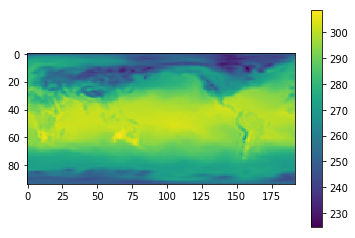

In [29]:
plt.imshow(air[0,:,:])
plt.colorbar();

## Exersise

 - Get `lat` and `lon` variables from netCDF file
 - What is the shape of this variables? 
 - plot 100th day of the dataset in $^{\circ}C$


### Save netCDF file

Minimalistic variant :)

In [30]:
!rm test_netcdf.nc
fw = Dataset('test_netcdf.nc', 'w')

fw.createDimension('t', 366)
fw.createDimension('y', 94)
fw.createDimension('x', 192)

air_var = fw.createVariable( 'air','float32', ('t', 'y', 'x'))
air_var[:] = air[:]
fw.close()

rm: cannot remove `test_netcdf.nc': No such file or directory


More descriptive variant:

In [31]:
!rm test_netcdf.nc
fw = Dataset('test_netcdf.nc', 'w')

fw.createDimension('TIME', 366)
fw.createDimension('LATITUDE', 94)
fw.createDimension('LONGITUDE', 192)

time = fw.createVariable('TIME', 'f', ('TIME',))
time[:] = fnc.variables['time'][:]
time.units = 'hours since 1-1-1 00:00:0.0' 

lat  = fw.createVariable('LATITUDE', 'f', ('LATITUDE',))
lat[:] = fnc.variables['lat'][:]

lon = fw.createVariable('LONGITUDE', 'f', ('LONGITUDE',))
lon[:] = fnc.variables['lon'][:]

ha = fw.createVariable('New_air','f', ('TIME', 'LATITUDE', 'LONGITUDE'))
ha[:] = air[:]
ha.missing_value = -9999.

fw.close()

## Links

* [PyNio - library that reads NetCDF, GRIB, HDF and so on ... ](http://www.pyngl.ucar.edu/Nio.shtml)
* [netCDF4 - advanced netCDF module](http://netcdf4-python.googlecode.com/svn/trunk/docs/netCDF4-module.html)
* [Scipy cookbook](http://wiki.scipy.org/Cookbook)